# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Import dataset

In [2]:
phishdata = pd.read_csv('cleandataset.csv')
phishdata.shape

(15420, 84)

# Feature Selection

In [3]:
#Standardize Numerical Data
X = phishdata.iloc[:, 2:-1]
X = X.drop('domain_with_copyright', axis=1)
original_column_names = X.columns
scaler = StandardScaler()
feature_matrix = scaler.fit_transform(X)
feature_matrix = pd.DataFrame(feature_matrix, columns=original_column_names)
feature_matrix

,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,total_of_,total_of~,...,onmouseover,right_clic,empty_title,domain_in_title,whois_registered_domain,domain_registration_length,domain_age,dns_record,google_index,page_rank
0,-0.123798,-1.300603,0.501875,-0.492379,-0.131109,2.602915,-0.173832,0.952783,-0.310928,-0.081602,...,-0.030145,-0.036929,-0.369116,0.558375,-0.160872,0.084613,0.645069,-0.108984,-1.02562,0.600231
1,9.485376,-1.300603,6.496384,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,-0.030145,-0.036929,2.709178,0.558375,-0.160872,-0.300197,-1.723686,-0.108984,0.97502,-1.366192
2,0.356661,-1.300603,0.501875,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,-0.030145,-0.036929,-0.369116,0.558375,-0.160872,-0.513196,-1.135527,-0.108984,0.97502,-1.366192
3,-0.796440,-1.300603,-0.354484,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,-0.030145,-0.036929,-0.369116,0.558375,-0.160872,-0.500251,-1.270209,-0.108984,-1.02562,-1.366192
4,-0.219889,-1.300603,-0.354484,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,-0.030145,-0.036929,-0.369116,-1.790912,-0.160872,-0.460240,-1.151646,-0.108984,-1.02562,0.206946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,-0.604256,0.768874,1.358233,-0.492379,-0.131109,2.602915,-0.173832,3.416836,-0.310928,-0.081602,...,-0.030145,-0.036929,-0.369116,-1.790912,-0.160872,-0.308435,0.110639,-0.108984,0.97502,-0.972907
15416,-0.604256,0.768874,-0.354484,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,5.900914,-0.081602,...,-0.030145,-0.036929,-0.369116,-1.790912,-0.160872,-0.057779,1.415550,-0.108984,0.97502,0.993515
15417,-0.412073,0.768874,-0.354484,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,-0.030145,-0.036929,-0.369116,-1.790912,-0.160872,-0.126033,0.185860,-0.108984,-1.02562,0.993515
15418,-0.315981,0.768874,2.214592,-0.492379,6.563252,2.602915,-0.173832,0.952783,-0.310928,-0.081602,...,-0.030145,-0.036929,-0.369116,0.558375,-0.160872,-0.404931,0.662979,-0.108984,0.97502,-1.366192


In [4]:
# Encode Categorical Data
dwc = pd.DataFrame(phishdata['domain_with_copyright'])
enc = OneHotEncoder(categories='auto').fit(dwc)
dwc = enc.transform(dwc).toarray()
dwc

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [5]:
# Combine Data
feature_matrix = pd.concat([pd.DataFrame(feature_matrix), pd.DataFrame(dwc)], axis=1)
print(feature_matrix)

       hostname_length        ip  total_of.  total_of-  total_of@  total_of?  \
0            -0.123798 -1.300603   0.501875  -0.492379  -0.131109   2.602915   
1             9.485376 -1.300603   6.496384  -0.492379  -0.131109  -0.361847   
2             0.356661 -1.300603   0.501875  -0.492379  -0.131109  -0.361847   
3            -0.796440 -1.300603  -0.354484  -0.492379  -0.131109  -0.361847   
4            -0.219889 -1.300603  -0.354484  -0.492379  -0.131109  -0.361847   
...                ...       ...        ...        ...        ...        ...   
15415        -0.604256  0.768874   1.358233  -0.492379  -0.131109   2.602915   
15416        -0.604256  0.768874  -0.354484  -0.492379  -0.131109  -0.361847   
15417        -0.412073  0.768874  -0.354484  -0.492379  -0.131109  -0.361847   
15418        -0.315981  0.768874   2.214592  -0.492379   6.563252   2.602915   
15419         0.837120  0.768874  -0.354484  -0.492379  -0.131109  -0.361847   

       total_of&  total_of=  total_of_ 

In [6]:
feature_matrix = feature_matrix.rename(columns={0: 'dwc1'})
feature_matrix = feature_matrix.rename(columns={1: 'dwc0'})

In [7]:
feature_matrix

,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,total_of_,total_of~,...,empty_title,domain_in_title,whois_registered_domain,domain_registration_length,domain_age,dns_record,google_index,page_rank,dwc1,dwc0
0,-0.123798,-1.300603,0.501875,-0.492379,-0.131109,2.602915,-0.173832,0.952783,-0.310928,-0.081602,...,-0.369116,0.558375,-0.160872,0.084613,0.645069,-0.108984,-1.02562,0.600231,1.0,0.0
1,9.485376,-1.300603,6.496384,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,2.709178,0.558375,-0.160872,-0.300197,-1.723686,-0.108984,0.97502,-1.366192,0.0,1.0
2,0.356661,-1.300603,0.501875,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,-0.369116,0.558375,-0.160872,-0.513196,-1.135527,-0.108984,0.97502,-1.366192,0.0,1.0
3,-0.796440,-1.300603,-0.354484,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,-0.369116,0.558375,-0.160872,-0.500251,-1.270209,-0.108984,-1.02562,-1.366192,1.0,0.0
4,-0.219889,-1.300603,-0.354484,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,-0.369116,-1.790912,-0.160872,-0.460240,-1.151646,-0.108984,-1.02562,0.206946,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,-0.604256,0.768874,1.358233,-0.492379,-0.131109,2.602915,-0.173832,3.416836,-0.310928,-0.081602,...,-0.369116,-1.790912,-0.160872,-0.308435,0.110639,-0.108984,0.97502,-0.972907,1.0,0.0
15416,-0.604256,0.768874,-0.354484,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,5.900914,-0.081602,...,-0.369116,-1.790912,-0.160872,-0.057779,1.415550,-0.108984,0.97502,0.993515,1.0,0.0
15417,-0.412073,0.768874,-0.354484,-0.492379,-0.131109,-0.361847,-0.173832,-0.279243,-0.310928,-0.081602,...,-0.369116,-1.790912,-0.160872,-0.126033,0.185860,-0.108984,-1.02562,0.993515,0.0,1.0
15418,-0.315981,0.768874,2.214592,-0.492379,6.563252,2.602915,-0.173832,0.952783,-0.310928,-0.081602,...,-0.369116,0.558375,-0.160872,-0.404931,0.662979,-0.108984,0.97502,-1.366192,0.0,1.0


In [8]:
# Split Data
y = pd.DataFrame(phishdata['status'])
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, y, test_size=0.25, random_state=45) 

In [9]:
# Random Forest Training
rf_all_features = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5,max_features=15)
rf_all_features.fit(X_train, y_train)
accuracy_score(y_test, rf_all_features.predict(X_test))# accuracy

D:\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9426718547341115

In [10]:
sel = SelectFromModel(rf_all_features)
sel  = sel.get_support()
sel

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False])

In [11]:
selected_feat= X_train.columns[(sel)]
print(selected_feat)# get 10 selected features

Index(['total_of_www', 'longest_word_path', 'phish_hints', 'nb_hyperlinks',
       'ratio_extHyperlinks', 'links_in_tags', 'safe_anchor', 'domain_age',
       'google_index', 'page_rank'],
      dtype='object')


In [12]:
# Feature scores
feature_scores = pd.Series(rf_all_features.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
feature_scores

google_index                  0.287001
nb_hyperlinks                 0.142135
page_rank                     0.131785
total_of_www                  0.088761
domain_age                    0.066134
ratio_extHyperlinks           0.033733
safe_anchor                   0.030464
phish_hints                   0.030245
links_in_tags                 0.023587
longest_word_path             0.020709
ratio_extRedirection          0.012100
longest_words_raw             0.011670
hostname_length               0.010972
ratio_digits_url              0.010549
shortest_word_host            0.010235
length_words_raw              0.008945
ratio_digits_host             0.008594
domain_in_title               0.007601
char_repeat                   0.007249
total_of.                     0.006494
total_of-                     0.006215
shortest_word_path            0.005224
avg_word_path                 0.004948
total_of/                     0.003116
total_of?                     0.002947
domain_in_brand          

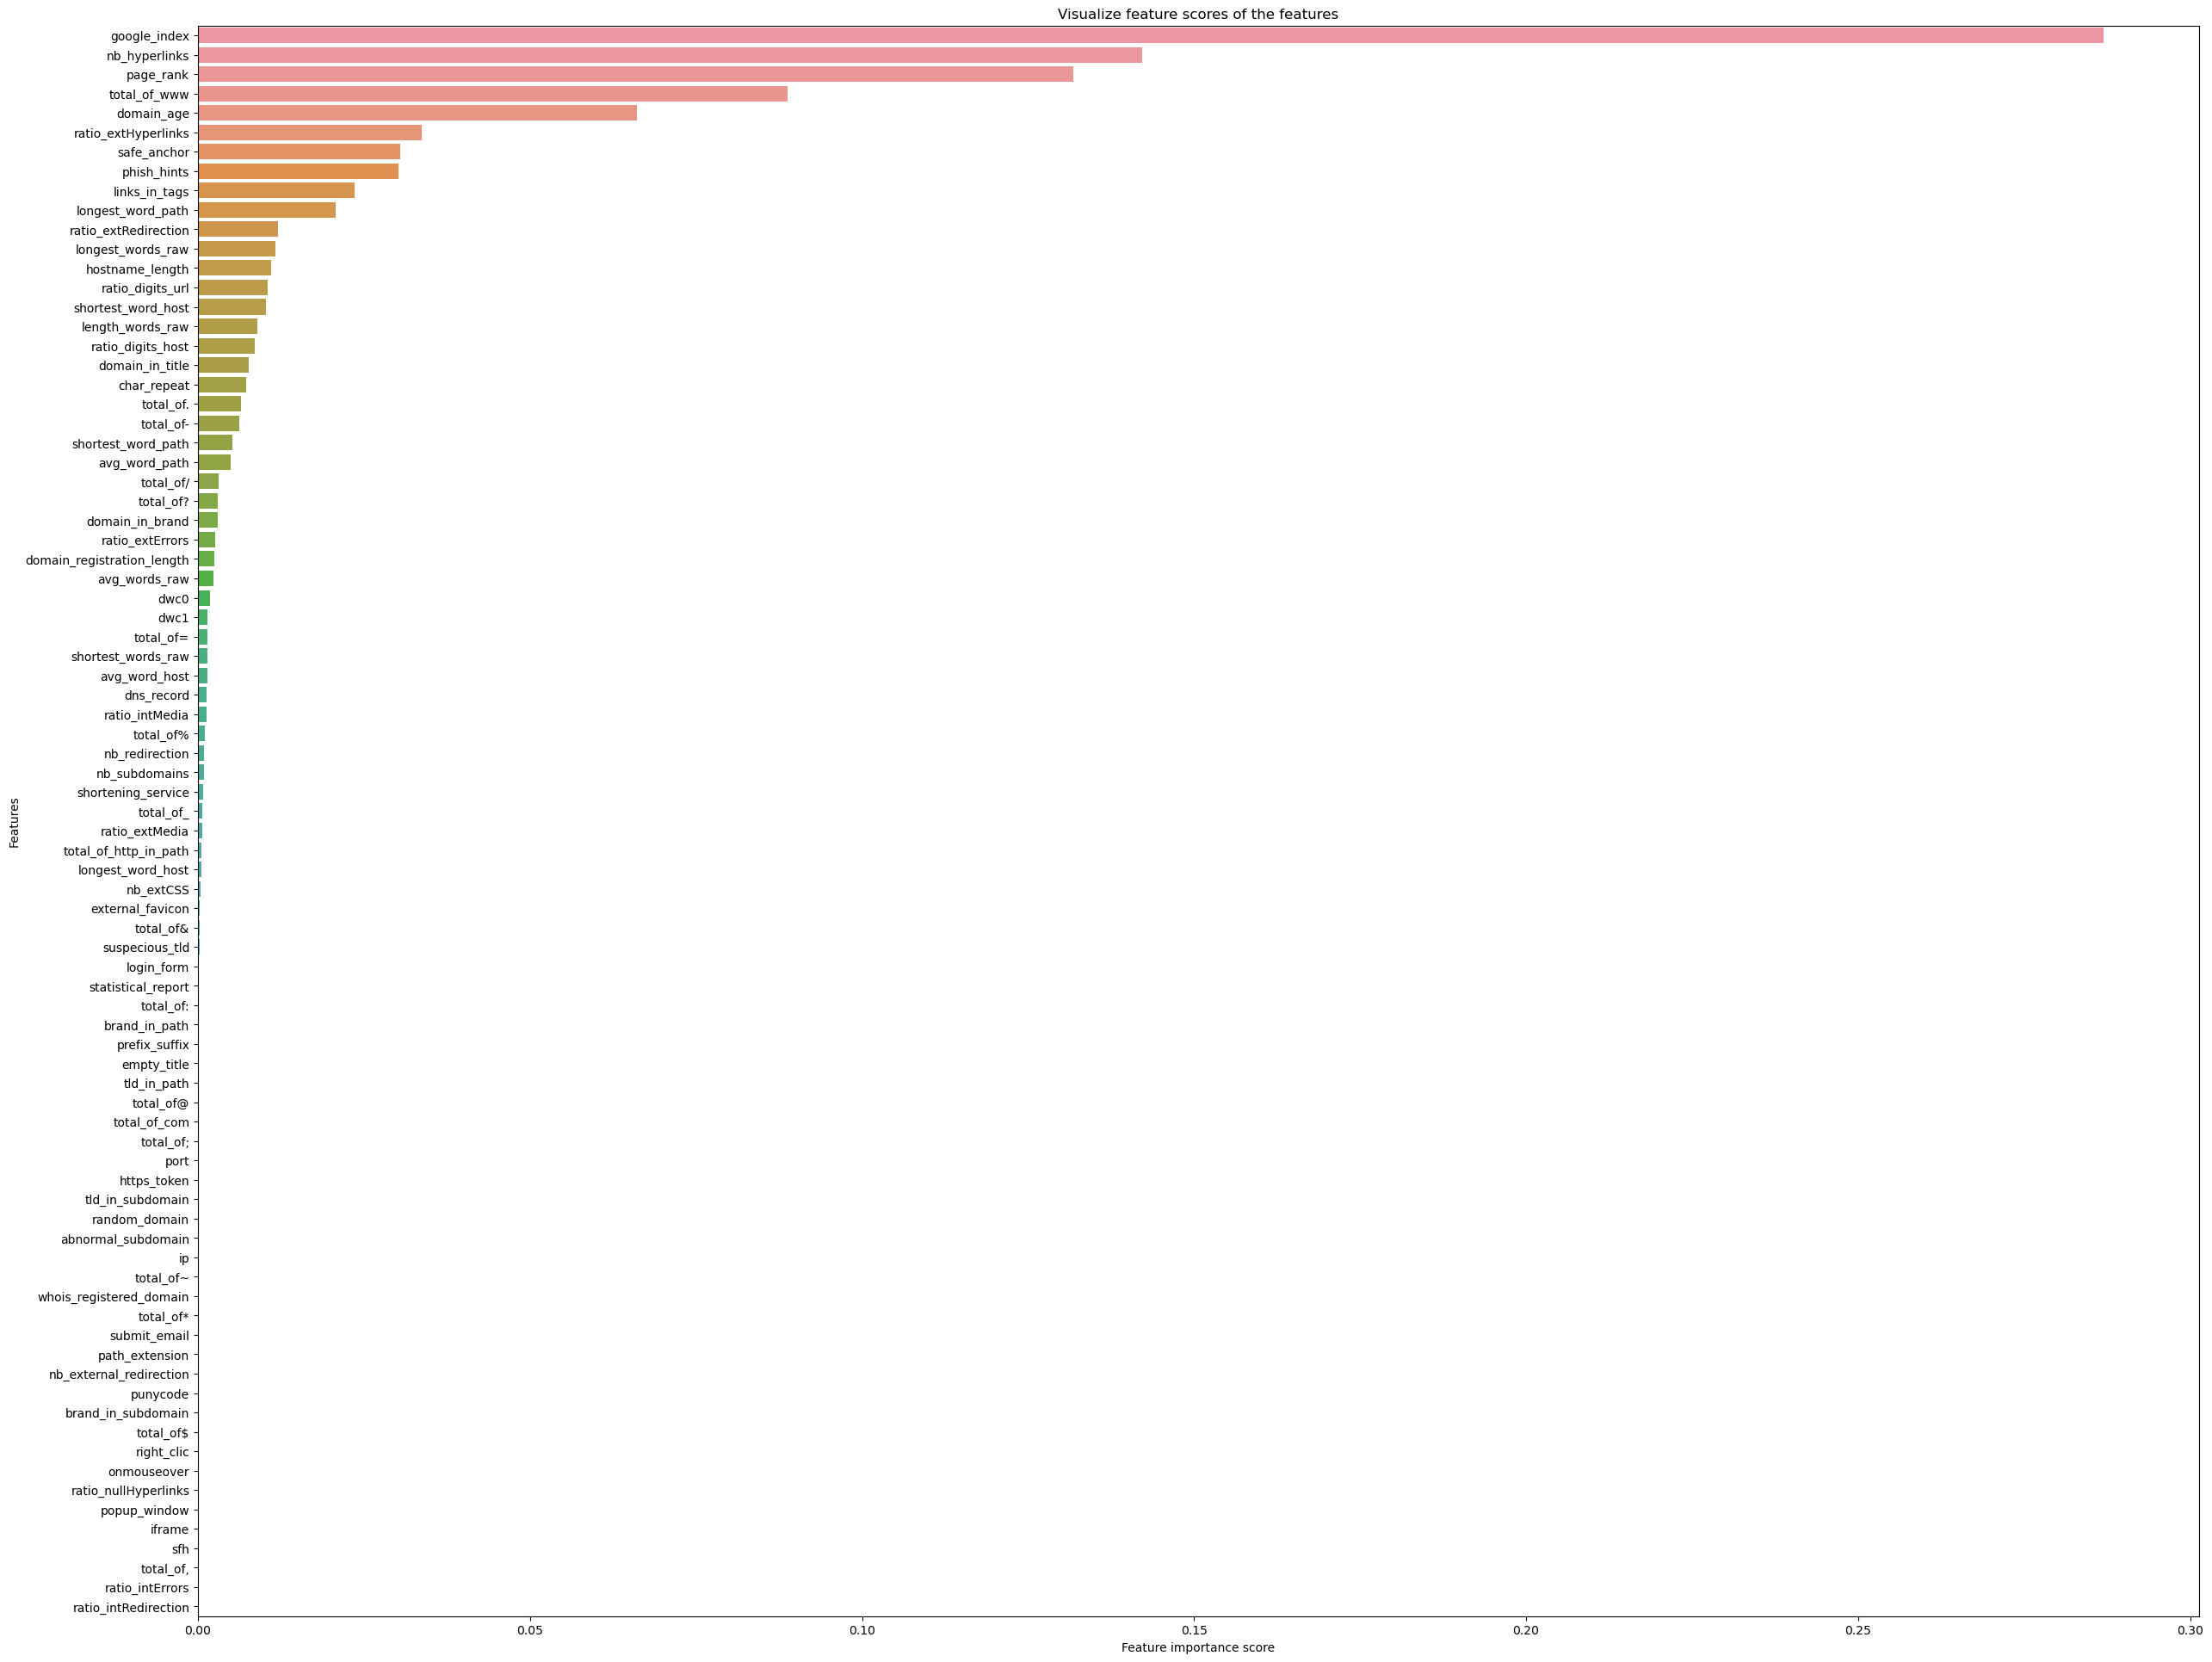

In [13]:
# Visualize feature scores
pd.set_option('display.max_rows', 10)
f, ax = plt.subplots(figsize=(30, 24))
ax = sb.barplot(x=feature_scores, y=feature_scores.index, data=phishdata)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [14]:
# drop unnecessary features
selected_feature= X_train.columns[sel]
X_train_selected = X_train[selected_feature]
selected_feature= X_test.columns[sel]
X_test_selected = X_test[selected_feature]

In [15]:
# check accuracy
clf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5,max_features=20)
clf.fit(X_test, y_test)
accuracy_score(y_test, clf.predict(X_test))#accuracy improved

D:\Anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9527885862516212

# Output

In [16]:
selected_feat

Index(['total_of_www', 'longest_word_path', 'phish_hints', 'nb_hyperlinks',
       'ratio_extHyperlinks', 'links_in_tags', 'safe_anchor', 'domain_age',
       'google_index', 'page_rank'],
      dtype='object')

In [17]:
# Clean dataset with 10 features
new_df = pd.DataFrame()
new_df['url'] = phishdata['url']
for i in selected_feat:
   new_df[i] = phishdata[i]
new_df['status'] = phishdata['status']

In [18]:
new_df

,url,total_of_www,longest_word_path,phish_hints,nb_hyperlinks,ratio_extHyperlinks,links_in_tags,safe_anchor,domain_age,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,1,5,0,143,0.069930,73.913043,77.777778,6678,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,0,0,2,0,0.000000,0.000000,0.000000,65,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,1,9,0,3,0.000000,100.000000,0.000000,1707,1,0,phishing
3,http://www.jp519.com/,1,0,0,404,0.037129,100.000000,82.539683,1331,0,0,legitimate
4,https://www.velocidrone.com/,1,0,0,57,0.315789,55.555556,81.081081,1662,0,4,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...
15415,http://www.dmega.co.kr/dmega/data/qna/sec/page...,1,26,0,92,0.000000,100.000000,100.000000,5186,1,1,phishing
15416,http://www.answers.com/Q/What_are_the_sizes_of...,1,8,0,66,0.151515,89.285714,20.000000,8829,1,6,legitimate
15417,http://www.fontspace.com/category/blackletter,1,11,0,199,0.115578,80.000000,0.000000,5396,0,6,legitimate
15418,http://www.budgetbots.com/server.php/Server%20...,1,8,0,3,0.000000,100.000000,0.000000,6728,1,0,phishing


In [19]:
new_df.to_csv('selected_dataset.csv', index=False)